<a href="https://colab.research.google.com/github/thual/POM-ch5-ondesSonores/blob/main/ondesSonores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Propagation, réflexion et transmission des ondes sonores

Activité : changez les paramètres des animations des ondes sonores !

**Contexte :**

Les oscillations de pression d'un tube rempli de gaz compressible sont régies par l'équation de d'Alembert
$${\partial^2 \widetilde p \over \partial t^2} (x,t) = c^2 \, {\partial^2 \widetilde p \over \partial x^2} (x,t)\,$$
où $\widetilde p (x,t)$ est la perturbation de pression. 

**Explorations de quatre types d'ondes sonores:**

*   La propagation d'une onde monochromatique
*   La superposition de deux pulses de vitesses opposées
*   La réflexion et la transmission d'une onde monochromatique au passage d'un changement de section du tube
*   La réflexion et la transmission d'un pulse au passage d'un changement de section du tube


## Propagation d'une onde monochromatique
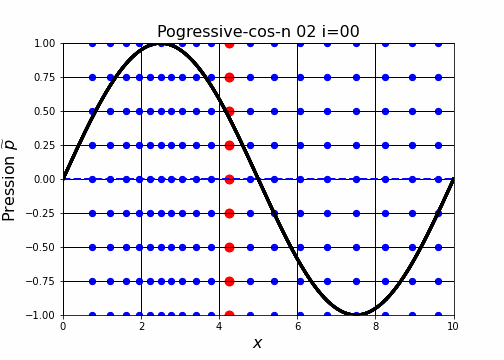

## Superposition de deux pulses de vitesses opposées
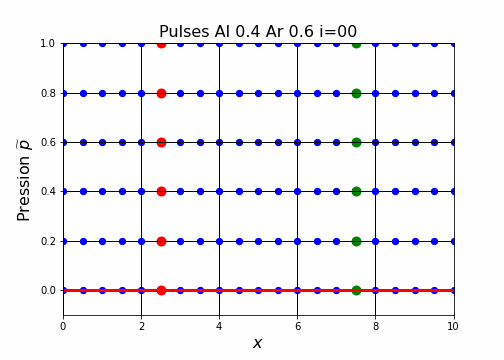

## Réflexion et la transmission d'une onde monochromatique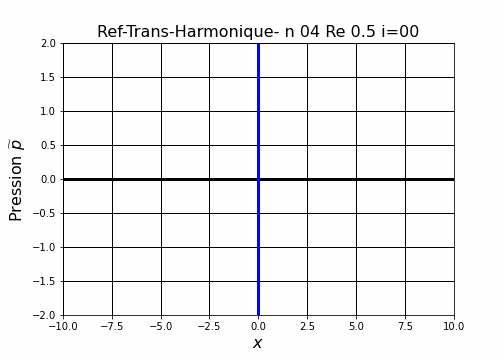

## Réflexion et la transmission d'un pulse
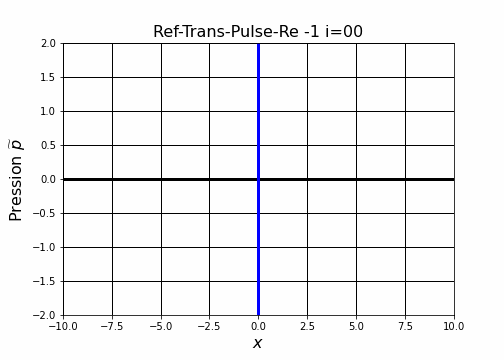

# Première partie du programme

Exécutez tout d'abord cette première partie du programme pour mettre en place les librairies et le sous-programme ! 
*   Colab : ⌘/Ctrl+F9 pour tout exécuter.
*   MyBinder : -> Run -> "Run all cells"


In [11]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

print("Ondes sonores")
# Petits outils
# ================================================

def zfi(x,le=2):
    miss=le-len(str(x))
    a='0'*miss+str(x)
    return a


# Animations d'ondes
# ================================================

def AniProCos(): 
    # Sinus n entier simple
    global Time, name
    global n, signaln, pressionn, ymin, ymax
    global inter, fram
    global sc, duprange
    Time=2*L/c;
    k=np.pi/L;
    ymin=-1; ymax=1;
    sc=1.5*L/N # scaling
    duprange=np.linspace(-1,1,9) # duplication points 
    # signal
    def signaln(a,t,n):
        xi=np.cos(n*k*(a-c*t))
        return xi
    def pressionn(a,t,n):
        p=np.sin(n*k*(a-c*t))
        return p
    # Boucle sur n
    for m in range(0,Nn):
        n=round(nmin+m*dn,2)
        name="Pogressive-cos-n "+zfi(n)
        print(name)
        fram=np.arange(0,Nt)
        ani=Gifanim(aniscat)      
    return ani

def AniDebPulse(): 
    # Pulses
    global Time, name
    global depla,signal,signalleft,signalright,ymin,ymax    
    global inter, fram
    global sc, duprange
    ymin=-1; ymax=1;
    Time=(L+2*d)/c; 
    ymin=-.1; ymax=1;
    sc=.5*L/N # scaling 
    duprange=np.linspace(-.2,1,7) # duplication points 
    # signal 
    def depla(a,t):
        xi=-Ar*pulsem(a+d-c*t,d)-Al*pulsep(a-L-d+c*t,d)
        return xi
    def signal(a,t):
        p=Ar*pulse(a+d-c*t,d)+Al*pulse(a-L-d+c*t,d)
        return p
    def signalleft(a,t):
        p=Al*pulse(a-L-d+c*t,d)
        return p
    def signalright(a,t):
        p=Ar*pulse(a+d-c*t,d)
        return p  
    # animation
    name="Pulses Al "+zfi(Al)+" Ar "+zfi(Ar)
    print(name)
    fram=np.arange(0,Nt)
    ani=Gifanim(anipulse)      
    return ani

def AniRetraHarm(): 
    # Reflexion transmission onde monochromatique
    global Time, name
    global finc, fref, ftra, ymin, ymax
    global inter, fram
    Time=4*L/c1;
    name="Ref-Trans-Harmonique- n "+zfi(nHarm)+" Re "+zfi(ReHarm)
    print("Reflexion Transmission c1=",c1,"c2=",c2,"Re=",ReHarm)
    k=np.pi/nHarm;
    ymin=-2; ymax=2; # 
    # signal 
    def finc(a,t):
        al=a[a<=0]; ar=0*a[a>0];
        fl=leftsin(L+al-c1*t,k)
        f=np.concatenate((fl,ar))
        return f
    def fref(a,t):
        al=a[a<=0]; ar=0*a[a>0];
        fl=-ReHarm*rightsin(-L+al+c1*t,k)
        f=np.concatenate((fl,ar))
        return f
    def ftra(a,t):
        al=0*a[a<=0]; ar=a[a>0];
        fr=TrHarm*leftsin(L+c1/c2*(ar-c2*t),k)
        f=np.concatenate((al,fr))
        return f
    # 
    fram=np.arange(0,Nt)
    ani=Gifanim(anitrois)
    return ani

def AniRetraPulse(): 
    # Reflexion transmission onde 
    global Time, name
    global finc, fref, ftra, ymin, ymax
    global inter, fram
    Time=3*L/c1; 
    name="Ref-Trans-Pulse-Re "+zfi(RePulse) 
    print("Reflexion Transmission c1=",c1,"c2=",c2,"Re=",RePulse)
    ymin=-2; ymax=2; # 
    # signal 
    def finc(a,t):
        al=a[a<=0]; ar=0*a[a>0];
        fl=pulse(L+dRef+al-c1*t,dRef)
        f=np.concatenate((fl,ar))
        return f
    def fref(a,t):
        al=a[a<=0]; ar=0*a[a>0];
        fl=-RePulse*pulse(-L-dRef+al+c1*t,dRef)
        f=np.concatenate((fl,ar))
        return f
    def ftra(a,t):
        al=0*a[a<=0]; ar=a[a>0];
        fr=TrPulse*pulse(L+dRef+c1/c2*(ar-c2*t),dRef)
        f=np.concatenate((al,fr))
        return f
    # 
    fram=np.arange(0,Nt)
    ani=Gifanim(anitrois)
    return ani



# Fonction d'animations appelées par FuncAnimation
# ================================================

def aniscat(i):
    # Animation simple
    global Time, name
    global n, signaln, pressionn, ymin, ymax
    global sc, duprange
    a=np.linspace(0,L,N+1);
    acont=np.linspace(0,L,Na);
    dt=Time/Nt
    # signal
    t=dt*i;
    # Figure 
    ax.clear()
    title=name+" i="+zfi(i)
    ax.set_xlabel(r'$x$',fontsize=16 )
    ax.set_ylabel(r'Pression $\widetilde{p}$',fontsize=16)
    ax.set_title(title,fontsize=16)
    ax.set_xlim(0,L)
    ax.set_ylim(ymin,ymax)
    ax.grid(color='black', axis='y', linestyle='-', linewidth=1)        
    ax.grid(color='black', axis='x', linestyle='-', linewidth=1)
    ax.plot([0,L],[0,0],'b--',linewidth=2)
    # Tracé du signal
    xi=signaln(a,t,n)
    pcont=pressionn(acont,t,n)
    for dup in duprange:
        ax.scatter(a+sc*xi,dup+0*xi,marker='o',color='blue',s=40)
        amid=a[int(N/2)]; ximid=xi[int(N/2)];
        ax.scatter(amid+sc*ximid,dup+0*ximid,marker='o',color='red',s=80)
        ax.plot(acont,pcont,color='black',linewidth=3)    
    # Sauver toutes les figures
    if FlagSavext: 
        namei=name+zfi(i)+ext;
        fig.savefig(namei)
                  

def anipulse(i):
    # Animation deux signaux
    global Time, name
    global n, signaln, pressionn, ymin, ymax
    global sc, duprange
    a=np.linspace(0,L,N+1);
    acont=np.linspace(0,L,Na);
    dt=Time/Nt
    # signal
    t=dt*i;
    # Figure 
    ax.clear()
    title=name+" i="+zfi(i)
    ax.set_xlabel(r'$x$',fontsize=16 )
    ax.set_ylabel(r'Pression $\widetilde{p}$',fontsize=16)
    ax.set_title(title,fontsize=16)
    ax.set_xlim(0,L)
    ax.set_ylim(ymin,ymax)
    ax.grid(color='black', axis='y', linestyle='-', linewidth=1)        
    ax.grid(color='black', axis='x', linestyle='-', linewidth=1)
    ax.plot([0,L],[0,0],'b--',linewidth=2)
    # discret
    xi=depla(a,t)
    for dup in duprange:
        ax.scatter(a+sc*xi,dup+0*xi,marker='o',color='blue',s=40)
        amid=a[int(N/4)]; ximid=xi[int(N/4)];
        ax.scatter(amid+sc*ximid,dup+0*ximid,marker='o',color='red',s=80)
        amid=a[int(3*N/4)]; ximid=xi[int(3*N/4)];
        ax.scatter(amid+sc*ximid,dup+0*ximid,marker='o',color='green',s=80)
    # continu 
    xicont=depla(acont,t)
    pcont=signal(acont,t)
    pleft=signalleft(acont,t)
    pright=signalright(acont,t)
    ax.plot(acont+sc*xicont,pcont,color='black',linewidth=3)
    ax.plot(acont+sc*xicont,pleft,color='green',linewidth=3)
    ax.plot(acont+sc*xicont,pright,color='red',linewidth=3)
    # Sauver toutes les figures
    if FlagSavext: 
        namei=name+zfi(i)+ext;
        fig.savefig(namei)

def anitrois(i):
    # Animation deux signaux
    global Time, name
    global finc, fref, ftra, ymin, ymax
    global sc, duprange
    L2=min(L,L*c2/c1);
    acont=np.linspace(-L,L2,Na);
    dt=Time/Nt
    # signal
    t=dt*i;
    # Figure 
    ax.clear()
    title=name+" i="+zfi(i)
    ax.set_xlabel(r'$x$',fontsize=16 )
    ax.set_ylabel(r'Pression $\widetilde{p}$',fontsize=16)
    ax.set_title(title,fontsize=16)
    ax.set_xlim(-L,L2)
    ax.set_ylim(ymin,ymax)
    ax.grid(color='black', axis='y', linestyle='-', linewidth=1)        
    ax.grid(color='black', axis='x', linestyle='-', linewidth=1)
    ax.plot([-L,L2],[0,0],'b--',linewidth=2)
    # Trace ondes
    fin=finc(acont,t)
    fre=fref(acont,t)
    ftr=ftra(acont,t)
    ftot=fin+fre+ftr
    ax.plot(acont,fin,color='red',linewidth=3)
    ax.plot(acont,fre,color='green',linewidth=3)
    ax.plot(acont,ftr,color='red',linewidth=3)
    ax.plot(acont,ftot,color='black',linewidth=3)
    ax.plot([0,0],[ymin,ymax],color='blue',linewidth=3)
    # Sauver toutes les figures
    if FlagSavext: 
        namei=name+zfi(i)+ext;
        fig.savefig(namei)


# Fonction Gifanim
# ================

def Gifanim(anifunc):
    global inter, fram
    ani=FuncAnimation(fig,anifunc,frames=fram,interval=inter,repeat=True)
    namegif=name+".gif"
    print(" ")   
    print("==================================")
    print("Simulation pour créer un gif animé")  
    ani.save(namegif,writer="pillow")
    print("   Gif animé créé :",namegif)
    # Visualisation animée de la simulation 
    print("Simulation pour visualiser l'animation")   
    plt.close() 
    plt.rc('animation', html='jshtml')
    return ani

# Physique
# ================

def pulse(a,d):
    al=0*a[a<-d]; ac=a[np.abs(a)<=d]; ar=0*a[a>d];
    k=np.pi/d; fc=.5*(1+np.cos(k*ac));
    f=np.concatenate((al,fc,ar))
    return f

def pulsem(a,d):
    al=0*a[a<-d]; ac=a[np.abs(a)<=d]; ar=0*a[a>d];
    k=np.pi/d; fc=ac-np.pi/k+np.sin(k*ac)/k
    f=np.concatenate((al-2*np.pi/k,fc,ar))
    return f

def pulsep(a,d):
    al=0*a[a<-d]; ac=a[np.abs(a)<=d]; ar=0*a[a>d];
    k=np.pi/d; fc=ac+np.pi/k+np.sin(k*ac)/k
    f=np.concatenate((al,fc,ar+2*np.pi/k))
    return f

def leftsin(a,k):
    al=a[a<=0]; ar=0*a[a>0];
    fl=-np.sin(k*al);
    f=np.concatenate((fl,ar))
    return f

def rightsin(a,k):
    al=0*a[a<=0]; ar=a[a>0];
    fr=np.sin(k*ar);
    f=np.concatenate((al,fr))
    return f



Ondes sonores


# Paramètres du programme

*(Colab : Cliquez sur le triangle à gauche de titre pour visualiser le code et changer les paramètres !)*

NB : les types d'ondes non activés sont lancés dans des lignes de commandes séparées, à la fin du programme.

**Paramètres communs aux types d'ondes**
* `Nt` : Nombre d'images par les animations temporelles (20)
* `N` : Nombre de points noirs (20)
* `FlagSavext` : Sauver les  des fichiers
* `ext`: Extension des fichiers à sauver (.png, .pdf, .jpg, etc.)

**Paramètres `AniProCos` : Onde sonore progressive**
* `FlagAniProCos` : Onde sonore progressive
* `Nn` :  Nombre de valeurs pour n variable (3)
* `dn` et `nmin` : Exploration de $n=nmin+m dn$ pour $m=1,...,Nn$ 

**Paramètres `AniDebPulse` : Rencontre de deux pulses**
* `FlagAniDebPulse` : Rencontre de deux pulses de pression
* `d` : Taille des pulses
* `Al` et `Ar` : Amplitudes des pulses

**Paramètres `AniRetraHarm` : Réflexion transmission harmonique**
* `FlagAniRetraHarm` : Réflexion et transmission d'une onde harmonique
* `nHarm=4` : Nombre d'onde incident dans le cas harmonique
* `c1` et `c2`: Vitesses à gauche et à droite
* `ReHarm` : Coefficient de réflexion 

**Paramètres `AniRetraPulse` : Réflexion transmission pulses**
* `FlagAniRetraPulse` : Réflexion et transmission d'une onde pulse
* `dRef` : Taille du pulse incident
* `c1` et `c2`: Vitesses à gauche et à droite
* `RePulse` : Coefficient de réflexion 

*Exécutez le code ci-dessous (Colab : cliquez sur "1 cellule masquée" pour changer les paramètres) !*

In [12]:
F=False; T=True

# Choix de l'animation 
## Affichage en ligne de la dernière uniquement
FlagAniProCos=T # Onde sonore progressive
FlagAniDebPulse=F # Rencontre de deux pulses de pression
FlagAniRetraHarm=F # Réflexion et transmission d'une onde harmonique
FlagAniRetraPulse=F # Réflexion et transmission d'une onde pulse

# Paramètres pouvant être changés
Nt=20 # Nombre d'images pour l'animation
N=20 # Nombre de ponts noirs
ext=".png"
FlagSavext=F # Création de fichier ext pour chaque image

# Parametres onde sonore progressive monochromatique
if FlagAniProCos:
    Nn=1 # Nombre de valeurs pour n variable
    dn=1; nmin=1; # Exploration de Nn valeurs de n

# Parametres rencontre de deux pulses
if FlagAniDebPulse:
    d=2; # Taille des pulses
    Al=.4; Ar=.6 # Amplitudes des pulses

# Parametres reflexion transmission harmonique
if FlagAniRetraHarm:
    nHarm=4; # Nombre d'onde incident dans le cas harmonique
    c1=1;c2=1; # Vitesses à gauche et à droite
    ReHarm=.5; # Coefficient de reflexion onde monochromatique
    TrHarm=1-ReHarm; # Coefficient de tranmission onde monochromatique

# Parametres reflexion transmission pulses
if FlagAniRetraPulse:
    dRef=2; # Taille du pulse incident
    c1=1;c2=1; # Vitesses à gauche et à droite
    RePulse=-1; # Coefficient de reflexion pulse
    TrPulse=1-RePulse; # Coefficient de tranmission pulse
   
# Paramètres qu'il n'est pas utile de changer
Na=501; # Nombre de points pour le tracé
L=10; # Longueur de l'intervalle
c=1; # Vitesse des ondes
inter=300; # millisecondes animation par défaut
rho=1; # densite
A=1 # Intension de l'onde incidente

# Figure preparation 
fig=plt.figure(1,figsize=(7,5))
ax=plt.subplot(1,1,1)
# Choix de l'animation
if FlagAniProCos==T: ani=AniProCos()
if FlagAniDebPulse==T: ani=AniDebPulse()
if FlagAniRetraHarm==T: ani=AniRetraHarm()
if FlagAniRetraPulse==T: ani=AniRetraPulse()


# Animation 
# Cette commande doit rester la dernière pour être suivie d'effet
ani

Pogressive-cos-n 01
 
Simulation pour créer un gif animé
   Gif animé créé : Pogressive-cos-n 01.gif
Simulation pour visualiser l'animation


# Autres animations

In [13]:
Nn=3 # Nombre de valeurs pour n variable
dn=1; nmin=2; # Exploration de Nn valeurs de n
AniProCos()

Pogressive-cos-n 02
 
Simulation pour créer un gif animé
   Gif animé créé : Pogressive-cos-n 02.gif
Simulation pour visualiser l'animation
Pogressive-cos-n 03
 
Simulation pour créer un gif animé
   Gif animé créé : Pogressive-cos-n 03.gif
Simulation pour visualiser l'animation
Pogressive-cos-n 04
 
Simulation pour créer un gif animé
   Gif animé créé : Pogressive-cos-n 04.gif
Simulation pour visualiser l'animation


In [14]:
d=2; # Taille des pulses
Al=.4; Ar=.6 # Amplitudes des pulses
AniDebPulse()

Pulses Al 0.4 Ar 0.6
 
Simulation pour créer un gif animé
   Gif animé créé : Pulses Al 0.4 Ar 0.6.gif
Simulation pour visualiser l'animation


In [15]:
nHarm=4; # Nombre d'onde incident dans le cas harmonique
c1=1;c2=1; # Vitesses à gauche et à droite
ReHarm=.5; # Coefficient de reflexion onde monochromatique
TrHarm=1-ReHarm; # Coefficient de tranmission onde monochromatique
AniRetraHarm()

Reflexion Transmission c1= 1 c2= 1 Re= 0.5
 
Simulation pour créer un gif animé
   Gif animé créé : Ref-Trans-Harmonique- n 04 Re 0.5.gif
Simulation pour visualiser l'animation


In [16]:
dRef=2; # Taille du pulse incident
c1=1;c2=1; # Vitesses à gauche et à droite
RePulse=-1; # Coefficient de reflexion pulse
TrPulse=1-RePulse; # Coefficient de tranmission pulse
AniRetraPulse()

Reflexion Transmission c1= 1 c2= 1 Re= -1
 
Simulation pour créer un gif animé
   Gif animé créé : Ref-Trans-Pulse-Re -1.gif
Simulation pour visualiser l'animation
